# Final Project

## Metric

## Datasets

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
#https://data.wprdc.org/dataset/city-of-pittsburgh-signalized-intersections
trafficLights = pd.read_csv("https://data.wprdc.org/datastore/dump/79ddcc74-33d2-4735-9b95-4169c7d0413d")

In [3]:
#https://data.wprdc.org/dataset/city-traffic-signs

In [4]:
trafficLights

,id,name,description,flash_time,flash_yellow,operation_type,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1233506574,TS1,Aiken Ave - Baum Blvd,24 Hr stop and go,NaN,Fully Actuated,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-23,40.456941,-79.938539
1,322808398,TS10,Alexander St - Steuben St,24 Hr stop and go,NaN,Semi Actuated,West End,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.441993,-80.034544
2,1626189126,TS100,Beeler St - Forbes Ave,24 Hr stop and go,NaN,Semi Actuated,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.443890,-79.938799
3,2085487046,TS101,Beeler St - Wilkins Ave,00:00 - 06:00,NaN,Fixed,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-26,40.445636,-79.931220
4,1187990770,TS102,Bellefield Ave - Fifth Ave,24 Hr stop and go,FIFTH AVE,Fixed,North Oakland,8.0,4.0,4.200304e+10,3.0,4.0,4.0,2-7,40.446484,-79.951914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,994278722,TS9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,1113074895,TSF153,Shady Alder RRFB,NaN,NaN,NaN,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,40.456814,-79.922437
776,1150087908,TS718,Butler St - 39th St,NaN,NaN,NaN,Lower Lawrenceville,7.0,6.0,4.200306e+10,2.0,6.0,2.0,3-3,40.467554,-79.963717
777,1741138031,TS723,NaN,NaN,NaN,NaN,Strip District,7.0,2.0,4.200302e+10,6.0,2.0,2.0,2-3,40.448705,-79.989339


## Water Features

## Cats are notoriously not fond of water.
![alt text](https://media.giphy.com/media/3h3K6PtjwTGrC/giphy.gif "GIF")

However, panthers love the water. 
* They love to swim
* They prefer habitats with lots of water, such as flooded forests and swamplands
* They spend a majority of their time in the wild swimming and hunting in or near water
* Unlike domestic cats, panthers do not have fastidous grooming habits and do not mind the weight of wet fur
## The Dataset
I chose my data from the Western Pennsylvania Regional Data Center.

I first found a dataset that contained the city's water features, broken down into types and labeled based on their neighborhood, make, and other criteria. For my purposes I only needed the feature type and neighborhood.

In [5]:
#https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7
waterFeatures = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7")
waterFeatures.head(10)

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408440,-80.028330
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440453,-79.984064
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454390,-80.008281
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450874,-80.001962
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451003,-80.001502
5,1230448600,Alton Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003191600,5,19,6,4-28,40.414280,-80.021457
6,887743707,Ammon Park Building,On/Off,Drinking Fountain,f,Murdock,https://tools.wprdc.org/images/pittsburgh/wate...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449286,-79.977871
7,1767127832,Ammon Park Spray,NaN,Spray,f,NaN,https://tools.wprdc.org/images/pittsburgh/wate...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449152,-79.978111
8,354464900,Armstrong Park,On/Off,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428300,-79.986198
9,495479912,Armstrong Park Spray,Continuous,Spray,f,NaN,https://tools.wprdc.org/images/pittsburgh/wate...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428185,-79.986127


As you can probably see, a lot of the data points happen to be drinking fountains, which are not very relavent to our metric. We need to use a query mask to filter out these points. I also used the value_counts function to single out the number of water features per neighborhood. This left me with a Series that showed the number of water features per neighborhood.

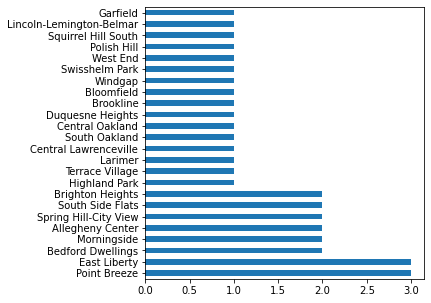

In [6]:
#Filter out only spray parks
query_mask = waterFeatures["feature_type"] != "Drinking Fountain"
waterDecor = waterFeatures[query_mask]
#Get number of fountains per neighborhood
waterDecor = waterDecor['neighborhood'].value_counts()
waterDecor = waterDecor.to_frame()
waterDecor["neighborhood"].plot(kind = "barh", figsize = (5,5))

This isn't a lot of data, so I added another dataframe, this time counting the number of pools in Pittsburgh.

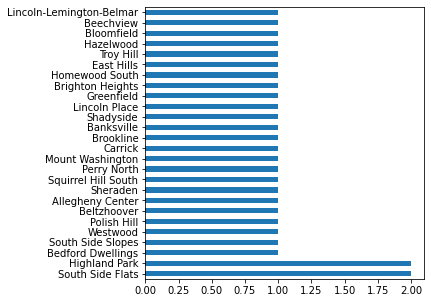

In [7]:
#https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a
waterPools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
#Get number of water features per neighborhood
waterPools = waterPools['neighborhood'].value_counts()
waterPools = waterPools.to_frame()
waterPools["neighborhood"].plot(kind = "barh", figsize = (5,5))

Now we need to combine these two datasets and make it look pretty. I concatenated the two series, but this left me with the problem of duplicate indices, which I solved by using a combination of the groupby and sum functions. After that, all I needed to do was fix some of the formatting and graph it.

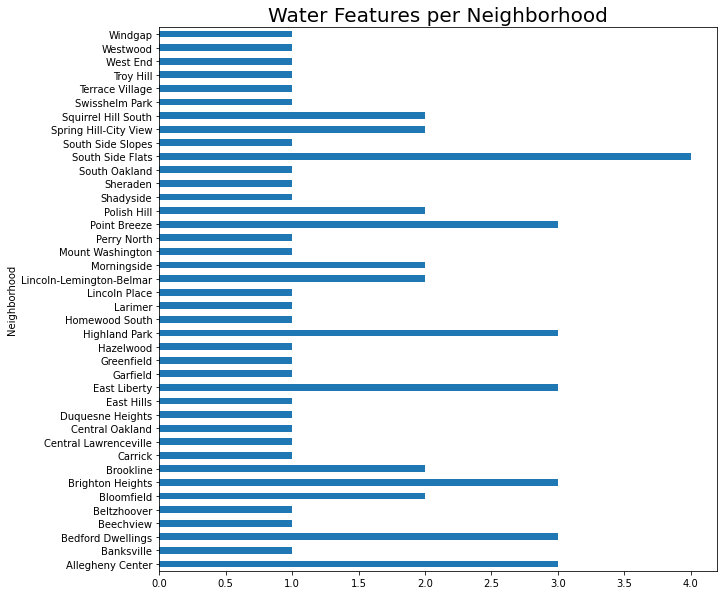

In [8]:
#Concatenate the two datasets to get the sum of all relevant water features
water = [waterDecor, waterPools]
water = pd.concat(water)
#Get rid of duplicate indices, sort values, and rename column
water = water.groupby(level=0).sum()
water = water.rename(columns = {"neighborhood" : "water_features"})
#Plot 
waterPlot = water.plot(kind = "barh", figsize = (10,10), title = "Water Features per Neighborhood", 
                       fontsize = 10, ylabel = "Neighborhood", legend = False)
waterPlot.axes.title.set_size(20)

In order to merge this new dataset with the location data for geopandas, the neighborhoods need to be in their own column, so I reset the index of the dataframe to shift the columns over by 1, giving me a column of neighborhood names. I also sorted the values to make it easier to view the data.

In [9]:
#Set neighborhoods in water df as another column so they can be added to graph
water = water.reset_index()

In [10]:
water = water.rename(columns = {"index" : "neighborhood"})
water = water.sort_values(by = "water_features", ascending = False)
water.head(15)

,neighborhood,water_features
30,South Side Flats,4
0,Allegheny Center,3
6,Brighton Heights,3
17,Highland Park,3
13,East Liberty,3
25,Point Breeze,3
2,Bedford Dwellings,3
5,Bloomfield,2
7,Brookline,2
22,Morningside,2


This new formatting of the dataframe will allow us to do a lot more with it. For example, now it can be 
mapped with geopandas.

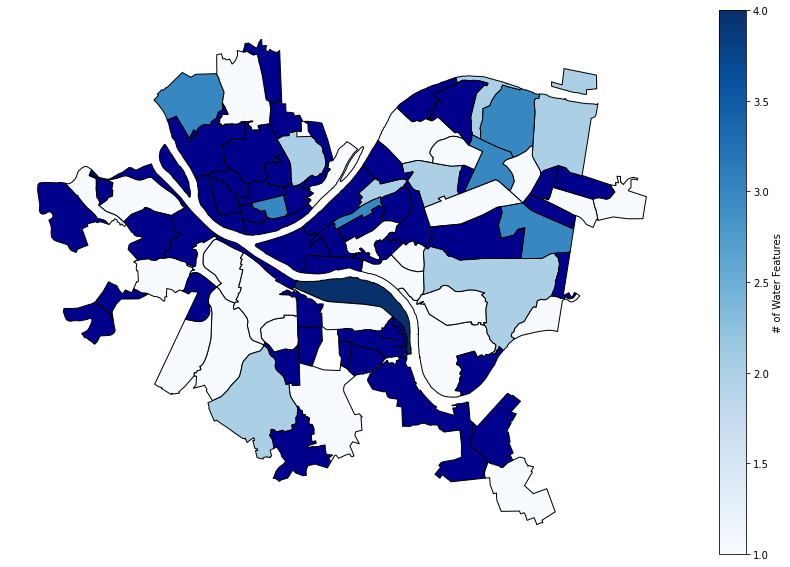

In [11]:
#Get shapefile for Pittsburgh neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#Merge and plot
geomap = neighborhoods.merge(water, how='outer', left_on='hood', right_on='neighborhood')
water_geoplot = geomap.plot(column='water_features', edgecolor="black", cmap='Blues', legend=True,
                            legend_kwds={'label': "# of Water Features"}, figsize=(15, 10), missing_kwds = {"color" : "darkblue"})
water_geoplot.set_axis_off();

This representation of the data makes it really easy to see which neighborhoods have a higher concentration of water features, and thus would be a good place for a panther. 

### Conclusion

In [12]:
water.head(7)

,neighborhood,water_features
30,South Side Flats,4
0,Allegheny Center,3
6,Brighton Heights,3
17,Highland Park,3
13,East Liberty,3
25,Point Breeze,3
2,Bedford Dwellings,3


According to my data, The best neighborhood in Pittsburgh for a panther is South Side Flats, with Allegheny Center, Brighton Heights, Highland Park, East Liberty, Point Breeze, and Bedford Dwellings close behind.

![title](https://images1.forrent.com/i2/sk1I-ZvBQNpDCiyuus6SfrE-6wBDUcAdw5wxUtoW1Bw/117/image.jpg)

This was a little surprising to me because South Side Flats does not seem to be the most hospitable environment for wildlife, let alone a big cat.

This led me to the conclusion that my metric may not be the best indicator of possible panther activity, and I will most likely weigh my data less when I combine it with other metrics.

## Traffic Signs

Panthers love running around for their own pleasure. Therefore, they dislike having to stop or slowdown in the middle of their runs. Having to slow down or stop is always annoying for Panthers since they have to slow down. This is the reason why stop signs and yield signs are their worst enemies. As a result, Panthers love to live in the neighborhoods with the least amount of stop signs and yield signs.

In [13]:
# Reading in the data set
cityTrafficSigns = pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")

In [14]:
# Prining out the data to see what it has
cityTrafficSigns

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74706,137646049,210,715,E Carson St,Pittsburgh,Metal Pole,NaN,Pay Parking,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428686,-79.991666
74707,261881880,PS-Snow,756,E Carson St,Pittsburgh,Metal Pole,NaN,Emergency Snow Route,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428601,-79.991250
74708,567930755,R4-11,754,E Carson St,Pittsburgh,Metal Pole,NaN,Bicycles May Use Full Lane,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428593,-79.991261
74709,1561469039,2,727,E Carson St,Pittsburgh,Channel,NaN,No Parking Anytime,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428701,-79.991235


Going through the data set, the most notable traffic signs that Panthers would dislike are the Stop Signs and Traffic Signs. The other signs are signifiers for road conditionas and guidelines. They do not require the Panthers to slow down and/or stop moving.

In [15]:
# Creating query masks to get the rows including stop signs and yields.
stopSigns = cityTrafficSigns['description'] == "Stop"
yieldSigns = cityTrafficSigns['description'] == "Yield"
# Creating two new data frames using the query masks above
trafficStopsOnly = cityTrafficSigns[stopSigns]
trafficYieldsOnly = cityTrafficSigns[yieldSigns]

In [16]:
# Grouping the data frames according to neighborhood, then getting the counts of all the columns and pulling out the description column as a series
trafficStops = trafficStopsOnly.groupby("neighborhood").count()["description"]
trafficYields = trafficYieldsOnly.groupby("neighborhood").count()["description"]

In [17]:
# Printing out the stop signs per neighborhood
trafficStops

neighborhood
Allegheny Center        8
Allegheny West         19
Allentown              73
Arlington              57
Arlington Heights       4
                       ..
Upper Lawrenceville    70
West End               16
West Oakland           35
Westwood               94
Windgap                37
Name: description, Length: 91, dtype: int64

In [18]:
# Printing out the yield signs per neighborhood
trafficYields

neighborhood
Allegheny West                3
Allentown                     1
Bedford Dwellings             1
Beechview                     2
Beltzhoover                   1
Bloomfield                    3
Bluff                         2
Bon Air                       1
Brighton Heights              8
Brookline                     2
California-Kirkbride          3
Central Business District    10
Central Lawrenceville         2
Central Oakland               1
Chateau                       4
Crawford-Roberts              3
Duquesne Heights              3
East Liberty                  1
Elliott                       1
Esplen                        1
Fairywood                     3
Fineview                      1
Greenfield                    5
Hays                         13
Highland Park                10
Knoxville                     1
Lincoln-Lemington-Belmar      2
Lower Lawrenceville           5
Marshall-Shadeland            3
Morningside                   2
Mount Washington           

In [19]:
print("There are " + str(trafficStops.sum()) + " stop signs recorded in this dataset")
print("There are " + str(trafficYields.sum()) + " yield signs recorded in this dataset")

There are 8347 stop signs recorded in this dataset
There are 155 yield signs recorded in this dataset


There are fewer records of yield signs in the dataseat as compared to stop signs. To remove the effect of the minimally recorded yield signs, I will give less weight to the yield signs in comparison to the stop signs. Additionally, Panthers are not as drastically effected by yield signs as compared to stop signs, since they do not have to stop if there are no other Panthers going on the road.

In [20]:
WTrafficYields = trafficYields*0.4
WTrafficStops = trafficStops*0.6

To compare the stop signs and yield signs in each neighborhood, I will create a new data frame including the weighted stop signs and yield signs with the totals for each neighborhood.

In [21]:
trafficSigns = pd.concat([WTrafficStops.rename("Stops"), WTrafficYields.rename("Yields")], axis=1).fillna(0)
trafficSigns["Total"] = trafficSigns["Stops"] + trafficSigns["Yields"]

In [22]:
# Here I am sorting the data according to its total in decending order
trafficSigns.sort_values('Total', inplace=True, ascending=False)

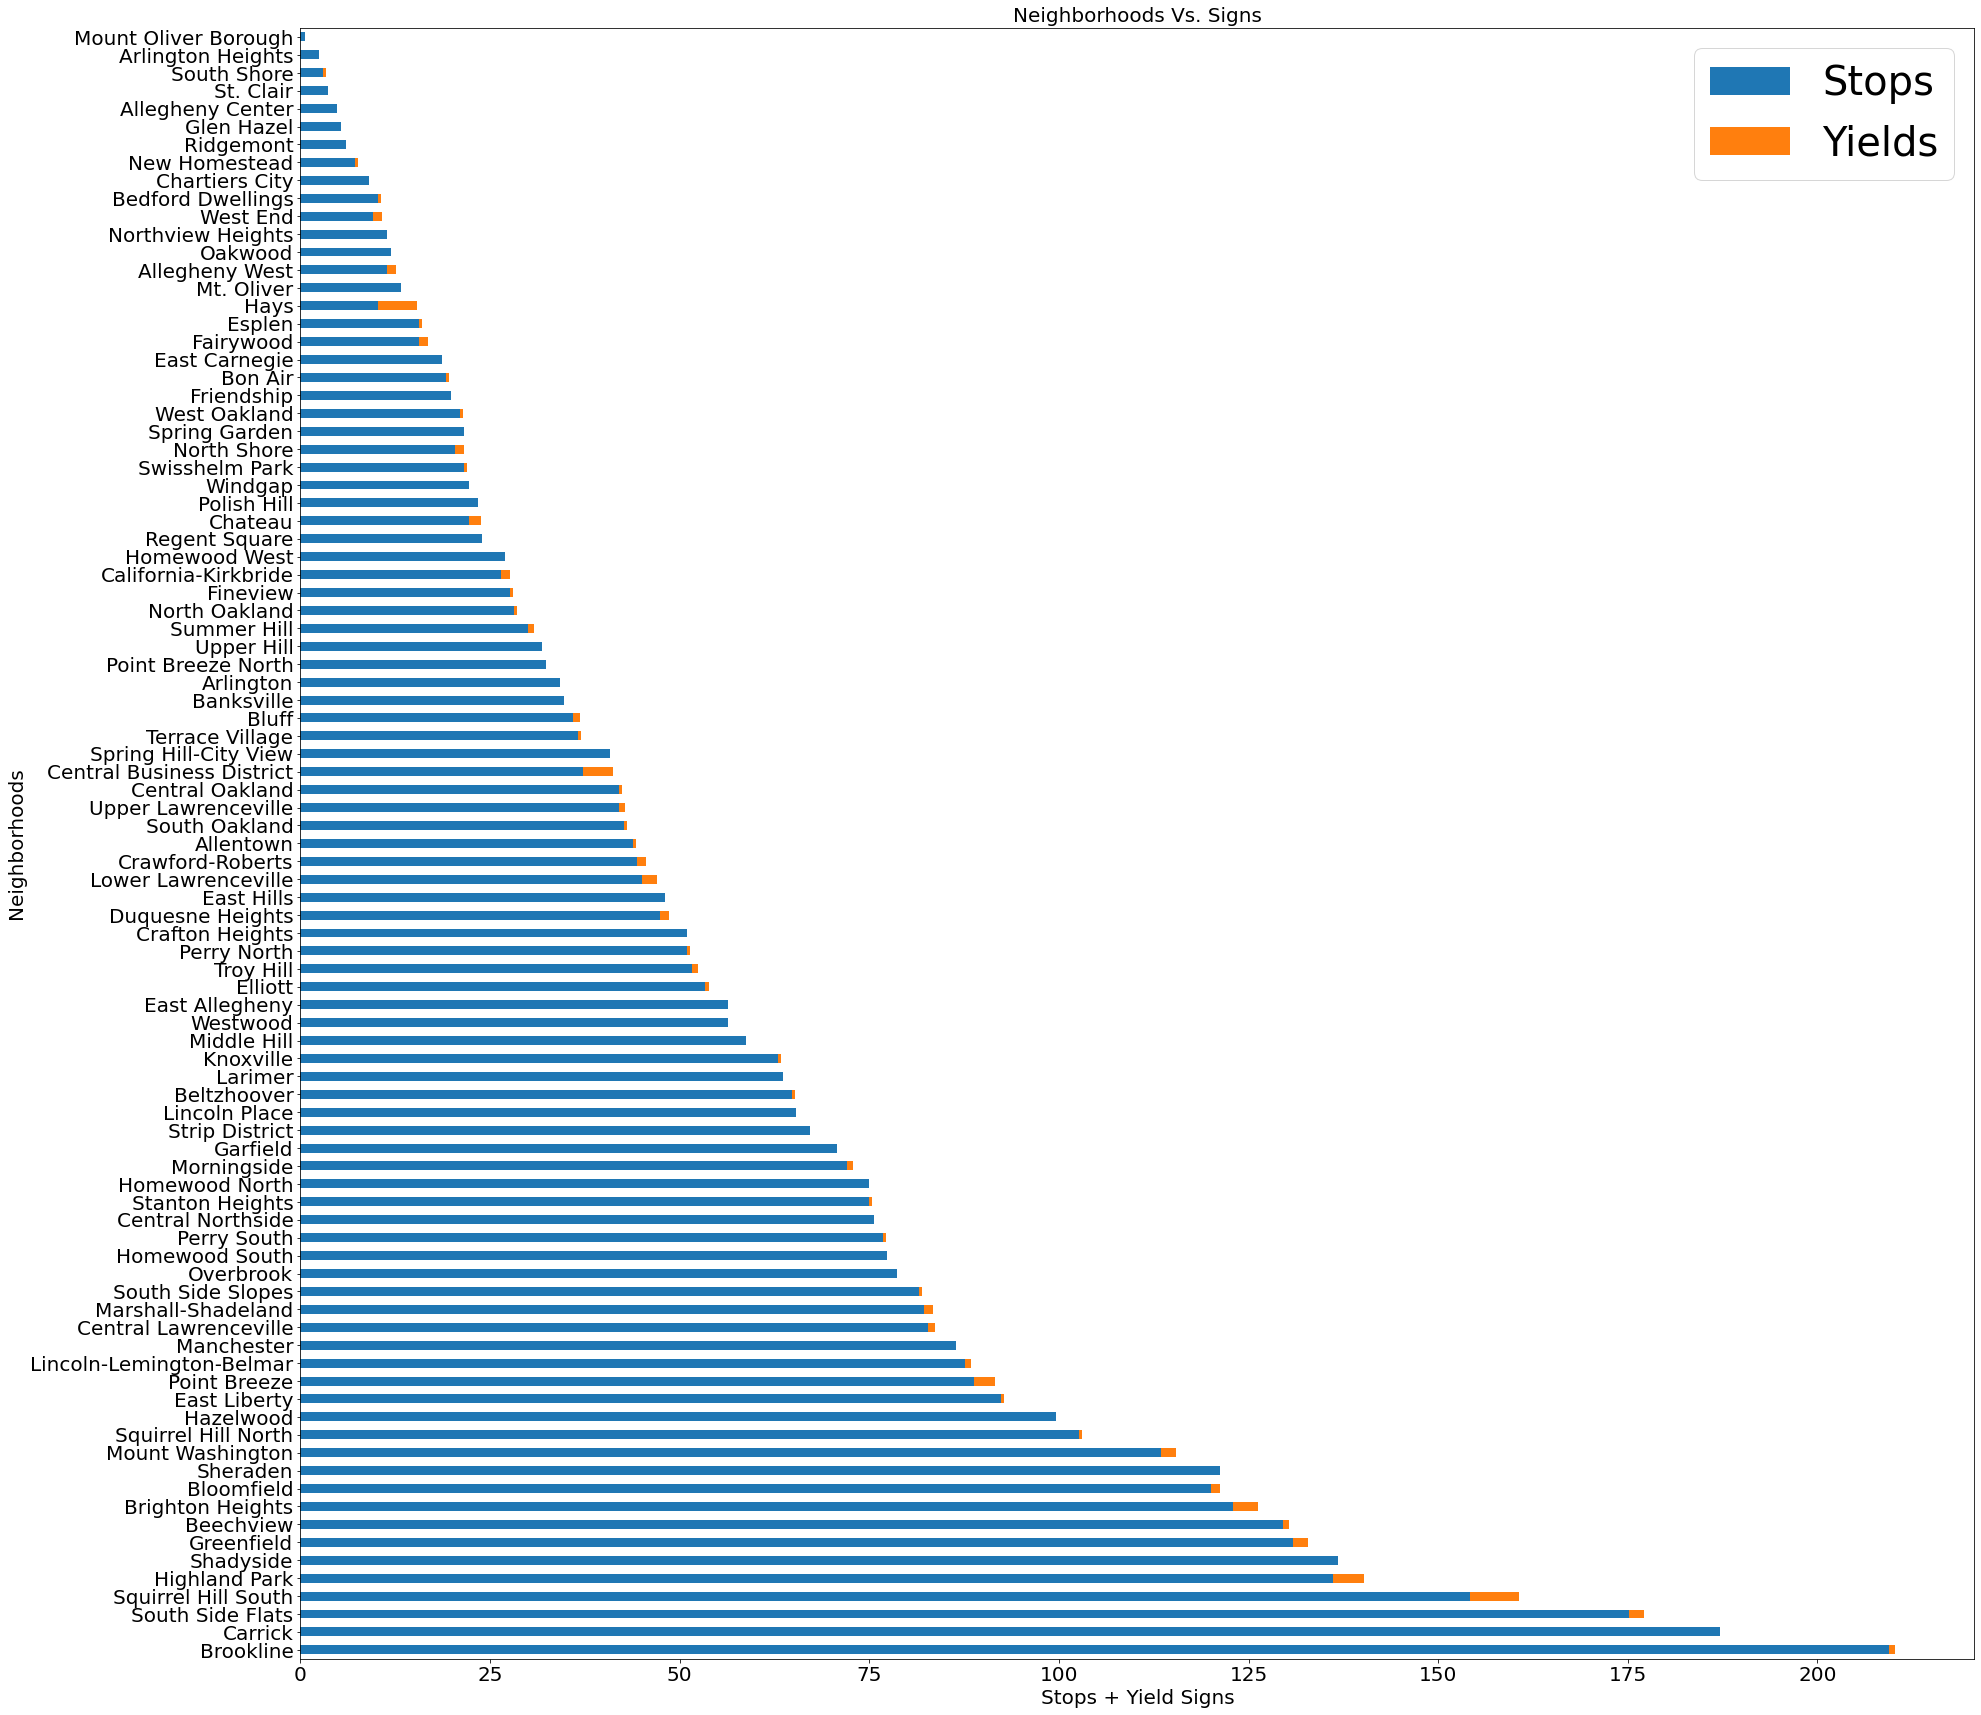

In [23]:
# Here I am creating a stacked bar chart containg the weighted stop signs and weighted yield signs
trafficSigns[['Stops', 'Yields']].plot(kind='barh', stacked=True, figsize=(30, 30), fontsize=20)
plt.title("Neighborhoods Vs. Signs", fontsize=20)
plt.xlabel("Stops + Yield Signs", fontsize=20)
plt.ylabel("Neighborhoods", fontsize=20)
plt.legend(prop={'size': 40})

In [24]:
# Merge the neighbor hood data with the traffic signs data
sign_map = neighborhoods.merge(trafficSigns[['Total']], how='left', left_on='hood', right_on='neighborhood')

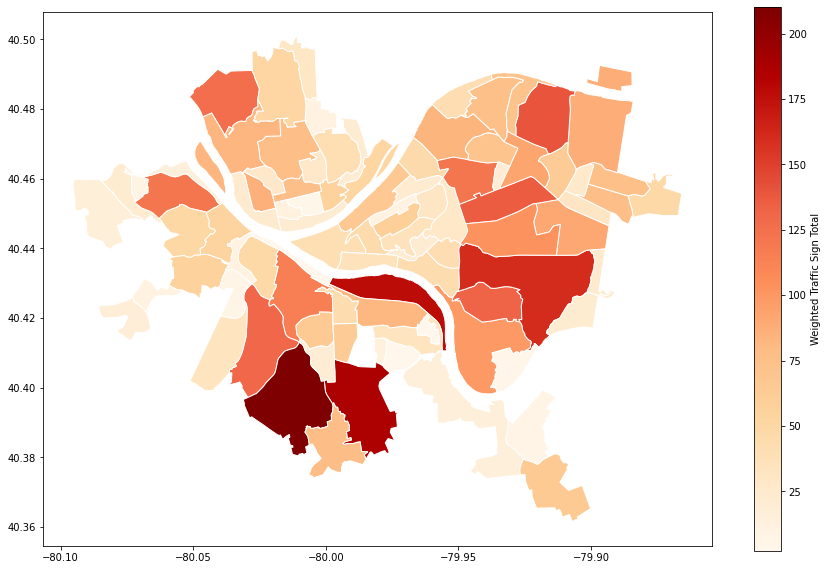

In [25]:
# Here I print out the geopandas plot
sign_map.plot(column='Total', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Weighted Traffic Sign Total"}, # label the legend
               figsize=(15, 10),         # set the size
               )